### **Road To ML: Course 6 - Cluster Analysis in Python**

#### **Chap 1: Introduction to Clustering**

In [1]:
%reset
# Import necessary module
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import fcluster, linkage

Nothing done.


##### **Unsupervised learning: basics**

**Example: Google news**\
It group the article with related content together using unsupervised learning algorithm (clustering) that match frequent terms in articles to find similarity.

**Unlabeled data:**
- Point 1:(1,2)
- Point 2:(2,2)
- Point 3:(3,1)

**Labeled data:**
- Point 1:(1,2), Label: Danger Zone
- Point 2:(2,2), Label: Normal Zone
- Point 3:(3,1), Label: Normal Zone

**Unsupervised learning:**
- machine learning algorithms that find patterns in data
- data in this algorithm must not be labeled or characterized
- common algorithms: clustering, neural networks, anomaly detection

**Clustering:**
- grouping items with similar characteristics
- items in groups are closer to each other than in other groups

![title](https://i.ibb.co/f0MwZ1y/cluter.jpg)

In [2]:
# exercise 1: Unsupervised learning in real world

Which of the following examples can be solved with unsupervised learning?\
A) A list of tweets to be classified based on their sentiment, the data has tweets associated with a positive or negative sentiment.\
B) A spam recognition system that marks incoming emails as spam, the data has emails marked as spam and not spam.\
C) Segmentation of learners at DataCamp based on courses they complete. The training data has no labels.

<b>*Answer: C*</b>

In [3]:
# exercise 2: Pokémon sightings

In [4]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

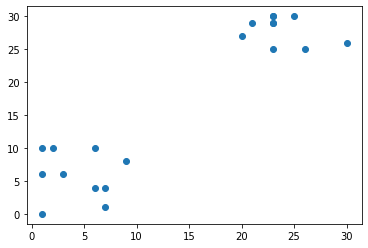

In [5]:
# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

##### **Cluster analysis: basics**

- group of items with similar characteristics

**Clustering algorithms:**
- hierarchical clustering
- K-means clustering
- DBSCAN (density based)
- Gaussian Methods
- etc...

**Hierarchical clustering (steps):**
1. calculate Cluster center - mean of attributes of all data points in a cluster (x,y)
2. merge closest clusters near the cluster center then recompute cluster center
3. repeat the steps until the distribution makes sense

**K-means clustering (steps):**
1. random cluster center is generated for each cluster
2. compute the cluster center distance and assign it to the clostest cluster then recompute the cluster center
3. repeat the steps until reaches the predefined number of times

In [6]:
# exercise 3: Pokémon sightings: hierarchical clustering

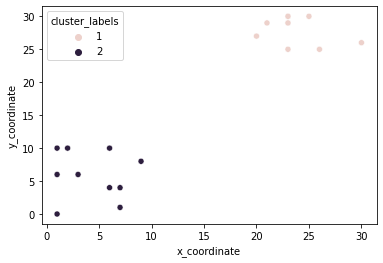

In [7]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

df = pd.DataFrame({'x_coordinate': x,
'y_coordinate': y})

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data=df)
plt.show()

In [8]:
# exercise 4: Pokémon sightings: k-means clustering

In [9]:
x = [9.0,6.0,2.0,3.0,1.0,7.0,1.0,6.0,1.0,7.0,23.0,26.0,25.0,23.0,21.0,23.0,23.0,20.0,30.0,23.0]
y = [8.0,4.0,10.0,6.0,0.0,4.0,10.0,10.0,6.0,1.0,29.0,25.0,30.0,29.0,29.0,30.0,25.0,27.0,26.0,30.0]

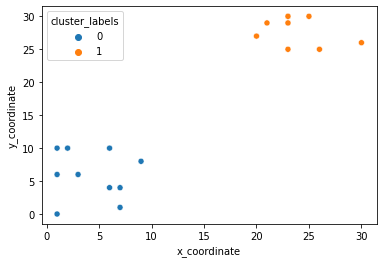

In [10]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

df = pd.DataFrame({'x_coordinate': x,
'y_coordinate': y})

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data=df)
plt.show()

##### **Data preparation for cluster analysis**

**Problems**
- incomparable units
- different scales
- data in raw form maybe bias in clustering
    - cluster heavily dependent on one variable
- solution: normalization and individual variables


**Standardization**
- rescaling data to standard deviation of 1
- $x_{new}= \frac{x-mean(x)}{S.D.(x)}$

In [11]:
# exercise 5: Normalize basic list data

In [12]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


In [13]:
# exercise 6: Visualize normalized data

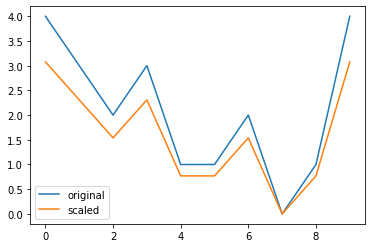

In [14]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

In [15]:
# exercise 7: Normalization of small numbers

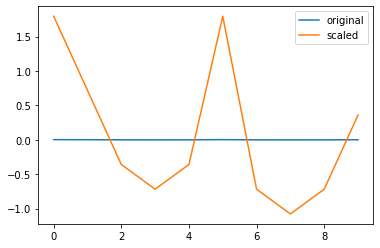

In [16]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

In [17]:
# exercise 8: FIFA 18: Normalize data

In [18]:
fifa = pd.read_csv('datasets/fifa_18_sample_data.csv')

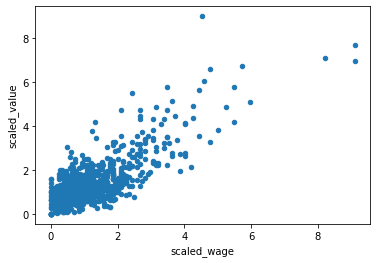

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [19]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

#### **Chap 2: Hierarchical Clustering**

##### **Basics of hierarchical clustering**

we can calculate the distance matrix by using `scipy.cluster.hierarchy.linkage`

**Linkage parameters:**
- `method`: how to calculate the proximity of clusters i.e. 'single'
- `metric`: metric distance between two objects i.e.'euclidean' (straight line distance between two points on a 2D plane)
- `optimal_ordering`: changes the order of linkage matrix i.e. True/False

**Which `method` to use?**

- **single**: two clostest object\
![title](https://i.ibb.co/nm4Rxtd/single.jpg)
- **complete**: on two farthest objects\
![title](https://i.ibb.co/ZYnDLZg/complete.jpg)
- **average**: arithmetic mean of all objects
- **centroid**: geometric mean of all objects
- **median**: median of all objects
- **ward**: $\text{summed squares of joint clusters} - \text{individual summed squares}$
![title](https://i.ibb.co/3vzVhqV/ward.jpg)
---

we can create cluster labels by using `scipy.cluster.hierarchy.fcluster`

**fcluster parameters:**
- `distance_matrix`: output of `linkage()` method
- `num_clusters`: number of clusters
- `criterion`: how to decide thresholds to form clusters

In [20]:
# exercise 1: Hierarchical clustering: ward method

In [21]:
comic_con = pd.read_csv("datasets/comic_con.csv",index_col=0)
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

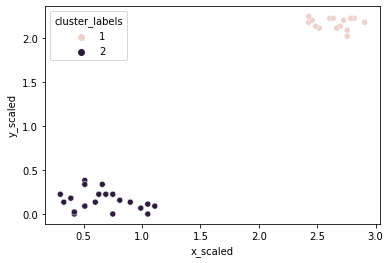

In [22]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [23]:
# exercise 2: Hierarchical clustering: single method

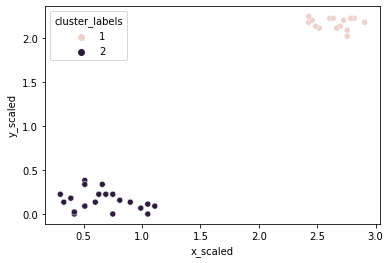

In [24]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [25]:
# exercise 3: Hierarchical clustering: complete method

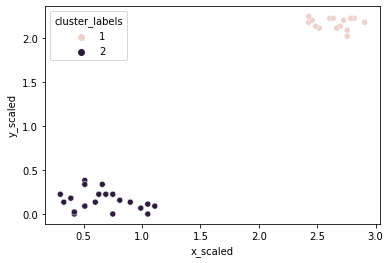

In [26]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled','y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix,2,criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

##### **Visualize clusters**

**Why visualize?**
- try to make sense of the clusters formed
- an additional step in validation clusters
- spot trends in data

**Seaborn: introduction**
- python data visualization based on `matplotlib`
- better, easily modifiable aesthetics than `matplotlib`
- `hue` parameter use for automatic color code (in matplotlib we have to assign it manually)

In [27]:
# exercise 4: Visualize clusters with matplotlib

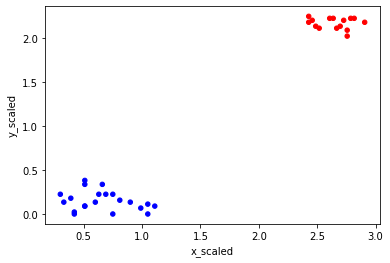

In [28]:
# Import the pyplot class
import matplotlib.pyplot as plt 

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

In [29]:
# exercise 5: Visualize clusters with seaborn

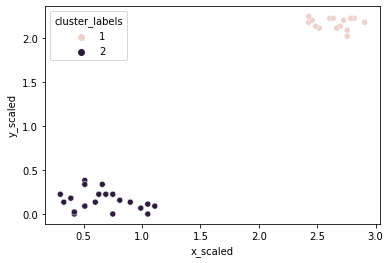

In [30]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

##### **How many clusters?**

- till now we only decide clusters based on visual inspection
- use of Dendrogram can help in showing progressions as clusters are merged

**Dendrogram:**
- is a branching diagram that shows how each cluster is composed by branching out into its child nodes
- wide branch = distance between clusters (more distinct)
- farthest away = different cluster

In [ ]:
# exercise 6: Create a dendrogram

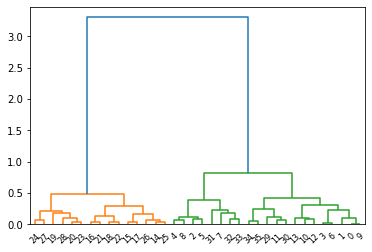

In [35]:
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

That's 2 clusters! (look at the top line)

##### **Limitations of hierarchical clustering**

- increase runtime with data points
- quadratic increase of runtime
- not feasible for large datasets

In [ ]:
# exercise 7: Timing run of hierarchical clustering

In [41]:
# from the comic_con datasets Chapter 2 Exercise 3
%timeit linkage(comic_con[['x_scaled','y_scaled']], method='complete', metric='euclidean')

425 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# exercise 8: FIFA 18: exploring defenders

In [46]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.837810           4.280968
2                            0.579966           1.766698
3                            1.166930           3.415214


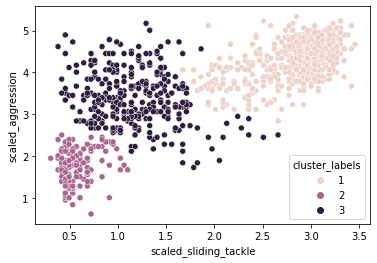

In [47]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

#### **Chap 3: K-Means Clustering**

##### **Basics of k-means clustering**

- K-means runs faster on large datasets than hierarchical clustering

we can setup K-means by using function `k-means`

**kmeans parameters:**
- `obs`: lists of standardized observation from `whiten()`
- `k_or_guess`: number of clusters
- `iter`: number of iterations (default = 20)
- `thres`: threshould of the algorithm from the last value changed since the last k-means iteration (default = 1e-5)
- `check_finite`: check of observation only contain finite numbers (default = True)
- returns two objects: cluster centers (code book) and single value of distortions (sum of square distances between data points and cluster centers)
---

we can setup cluster labels by using function `vq`

**vq parameters:**
- `obs`: lists of standardized observation from `whiten()`
- `code_book`: cluster centers (first output of `kmeans()`)
- `check_finite`: check of observation only contain finite numbers (default = True)
- returns to objects: cluster labels (code book index) and a list of distortions

mean of distortions list $\approx$ distortion value from `kmeans`

In [48]:
# exercise 1: K-means clustering: first exercise
# comic_con datasets

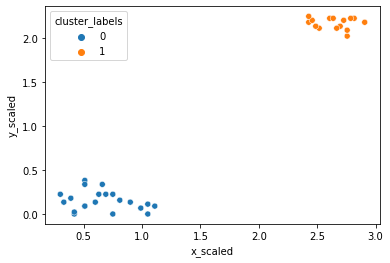

In [55]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [ ]:
# exercise 2: Runtime of k-means clustering
# fifa datasets

In [57]:
# hierarchy clustering
%timeit linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')

22.9 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [56]:
# k-means clustering
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 2)

10.3 ms ± 874 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### **How many clusters?**

- in K-means, there are no absolute method to find the right number of clusters
- Elbow plot can be use to identify it

**Distortions: revisited**
- is a sum of squared distances of points form cluster centers
- ditortion decreases when the number of clusters increases
    - becomes zero when num of clusters = number of points
- Elbow plot: line plot between cluster centers and distortion

![title](https://i.ibb.co/KXnbWdR/distorr.jpg)

**Elbow plot**
- x-axis = number of clusters
- y-axis = distortion
- optimal cluster is at the turning point (picture below = 3)
- does not always pinpoint how many clusters
- fails when the data is evenly distributed
- other methods: average silhouette and gap statistic

![title](https://i.ibb.co/sWGnfJX/elbowplot.jpg)

In [58]:
# exercise 3: Elbow method on distinct clusters
# comic_con datasets

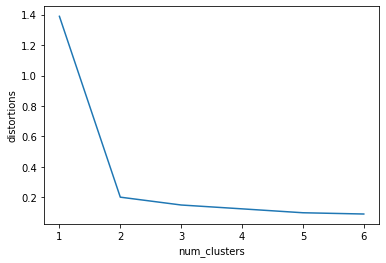

In [61]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
# exercise 4: Elbow method on uniform data

In [62]:
uniform_data = pd.read_csv('datasets/uniform_data.csv', index_col=0)
uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])

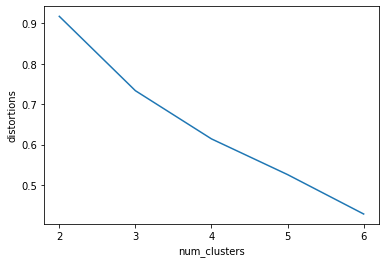

In [63]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

the elbow cannot be determined in this plot

##### **Limitations of k-means clustering**

- how to find the right number of clusters?
    - elbow plot does not always work
- impact of seeds (initial cluster centers is random)
    - set random number generation (seed) beforehand i.e. `random.seed(12)`\
    ![title](https://i.ibb.co/THGqpM1/seedsimpact.jpg)
- biased towards equal sized clusters
    ![title](https://i.ibb.co/qr2YZ4G/uniformclusterimpact.jpg)

In [ ]:
# exercise 5: Impact of seeds on distinct clusters

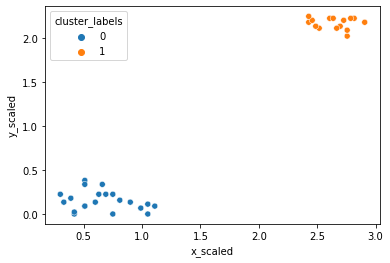

In [64]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

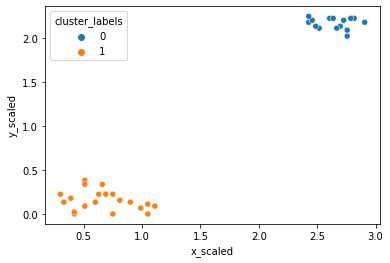

In [66]:
# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [76]:
# exercise 6: Uniform clustering patterns

In [78]:
mouse = pd.read_csv('datasets/mouse.csv',index_col=0)
mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])

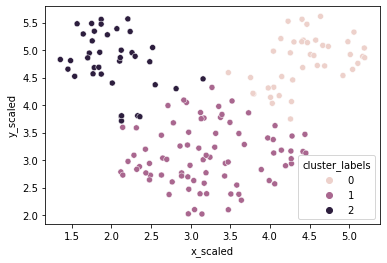

In [77]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans,vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']],3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled','y_scaled']],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

In [ ]:
# exercise 7: FIFA 18: defenders revisited
# linked to chapter 2 exercise 8 

In [80]:
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


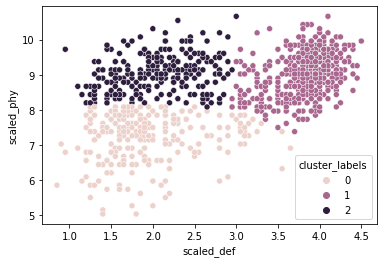

In [81]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

#### **Chap 4: Clustering in Real World**

##### **Dominant colors in images**

- all images consist of pixels
- each pixel has 3 values: Red, Green, Blue
    - pixel color is the combination of these RGB values
- perform k-means on standardized RGB values to find cluster centers
- Uses: identifying features in satellite image
![title](https://i.ibb.co/5M28cvw/satte.jpg)

**Tools to find dominant colors**
- `matplotlib.image.imread`: convert image to pixels
- `matplotlib.pyplot.imshow`: display colors of cluster centers


There are broadly three steps to find the dominant colors in an image:

- Extract RGB values into three lists.
- Perform k-means clustering on scaled RGB values.
- Display the colors of cluster centers.

To extract RGB values, we use the `imread()` function of the `image` class of `matplotlib` and empty lists, `r`, `g` and `b`.

In [ ]:
# exercise 1: Extract RGB values from image

In [88]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('datasets/batman.jpg')
print(batman_image.shape)

r,g,b = [],[],[]

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


In [ ]:
# exercise 2: How many dominant colors?

In [90]:
batman_df = pd.DataFrame({'red': r,'blue': b,'green': g})
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

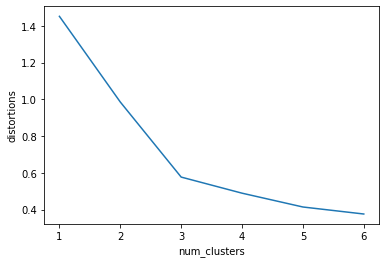

In [91]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
# exercise 3: Display dominant colors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


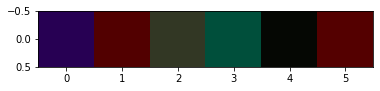

In [124]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()
 
colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255.0,
        scaled_g * g_std / 255.0,
        scaled_b * b_std / 255.0
    ))
 
# Display colors of cluster centers
plt.imshow([colors])
plt.show()

##### **Document clustering**
NLP concept

**Concepts:**
1. Clean data before processing (remove puntuation, emoticons, and words like "the, is, are")
2. Determine the importance of the terms in a document (in TF-IDF matrix)
3. Cluster TF-IDF (Term Frequency - Inverse Document Frequency) matrix
4. Find top terms, documents in each cluster

**Clean and tokenize data**
- text itself cannot be analyzed before converting into small tokens using `nktk.tokenize.word_tokenize`
- once relevant terms have been extracted, a matrix is formed, with the terms and documents as dimensions
    - an element of the matrix signifies how many times a term has occured in each document
    - since most elements in the matrix will be zeros, sparse matrix is created that contains non-zero elements

**TF-IDF**
- weighted measure: evaluate how important a word is to a document in a collection
- use `sklearn.feature_extraction.text.TfidfVectorizer` to find TF-IDF of terms in a group of documents

**TF-IDF parameters**
- `max_df` & `min_df`:max/min fraction of documents a word should occur in

**Top terms per cluster**
- cluster centers: list of TF-IDF weights which signifies the importance of each term in the matrix

**More considerations**
- replace hyperlinks, emoticon with something else
- Normalize words i.e. run, ran, running -> run
- `.todense()` may not work with large datasets

In [ ]:
# exercise 4: TF-IDF of movie plots

Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

In [128]:
movie = pd.read_csv('datasets/movies_plot.csv')
plots = movie['Plot'].values

In [157]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_noise(text, stop_words = stop_words):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

remove_noise("It is lovely weather we are having. I hope the weather continues.")

['lovely', 'weather', 'hope', 'weather', 'continues']

In [158]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50,
min_df=0.1,tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

In [159]:
# exercise 5: Top terms in movie clusters

Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the `.todense()` method to convert the sparse matrix, `tfidf_matrix` to a normal matrix for the `kmeans()` function to process. Then, use the `.get_feature_names()` method to get a list of terms in the `tfidf_vectorizer` object. The `zip()` function in Python joins two lists.

In [165]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(),num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, cluster_centers[i]))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['film', 'wife', 'life']
['back', 'two', 'one']


##### **Clustering with multiple features**

**Basic checks:**
1. Check how cluster centers vary with respect to the overall data. If some cluster centers of some features does not vary significantly with respect to the overall data, you can drop it in the next run.
2. Check size of clusters formed. If one or more clusters are significantly smaller than the rest, check if their cluster centers are similar to other clusters.
    - If 'yes', reduce the number of clusters


**Visualizations**
- visualize cluster centers
- visualize other variables for each cluster

**Feature reduction**
- Factor analysis
- Multidimensional scaling

In [ ]:
# exercise 6: Clustering with many features

What should you do if you have too many features for clustering?\
A) Visualize all the features\
B) Reduce features using a technique like Factor Analysis\
C) Perform hierarchical clustering

<b>*Answer: B*</b>

In [ ]:
# exercise 7: Basic checks on clusters

Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players. 

In [175]:
fifa = pd.read_csv('datasets/fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [182]:
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])

scaled_features = ['scaled_pac', 'scaled_dri', 'scaled_sho']

cluster_centers, _ = kmeans(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], 3)
fifa['cluster_labels'], _ = vq(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], cluster_centers)

In [183]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    473
1    346
2    181
Name: ID, dtype: int64
cluster_labels
0    76090.909091
1    64115.606936
2    62193.370166
Name: eur_wage, dtype: float64


In [ ]:
# exercise 8: FIFA 18: what makes a complete player?

In [184]:
fifa['scaled_phy'] = whiten(fifa['phy'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_pas'] = whiten(fifa['pas'])

                scaled_pac  scaled_dri  scaled_sho
cluster_labels                                    
0                 5.286687    6.669800    3.613880
1                 6.699160    8.487745    5.388105


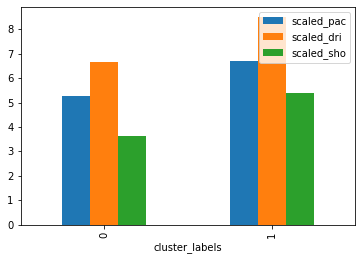

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín' 'M. Hummels']


In [185]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

Notice: 1 = top attacker , 0 = top defender